In [1]:
from tqdm import tqdm
import pandas as pd

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)


## Our role:

Consultant for "Delta Air Lines Inc."
We want to:

- Predict if a flight will be delayed or not at arrival
- Predict the delay time of a flight at arrival
- Find the most important possible recurrent reasons of delay

## inportant information

- target variables: Delayed (classification) and ArrDelayMinutes (regression)

## To Do

## Backup Ideas:

- airtime: compute the average for each trip?


In [2]:
df = pd.read_csv("../data/delta_combined_flights_2018_2022.csv")

df[""]
df.drop(columns=["Airline"], inplace=True)

# Drop all the cancelled flights
# df = df[df['CANCELLED'] == 0]


In [3]:
# create categorical variables for night, morning, afternoon, evening based on DepTime
df["DepTime"] = df["DepTime"].astype(int)
df["TimeOfDay"] = df["DepTime"].apply(
    lambda x: "Night"
    if x < 600
    else "Morning"
    if x < 1200
    else "Afternoon"
    if x < 1800
    else "Evening"
    if x < 2400
    else "Night"
)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

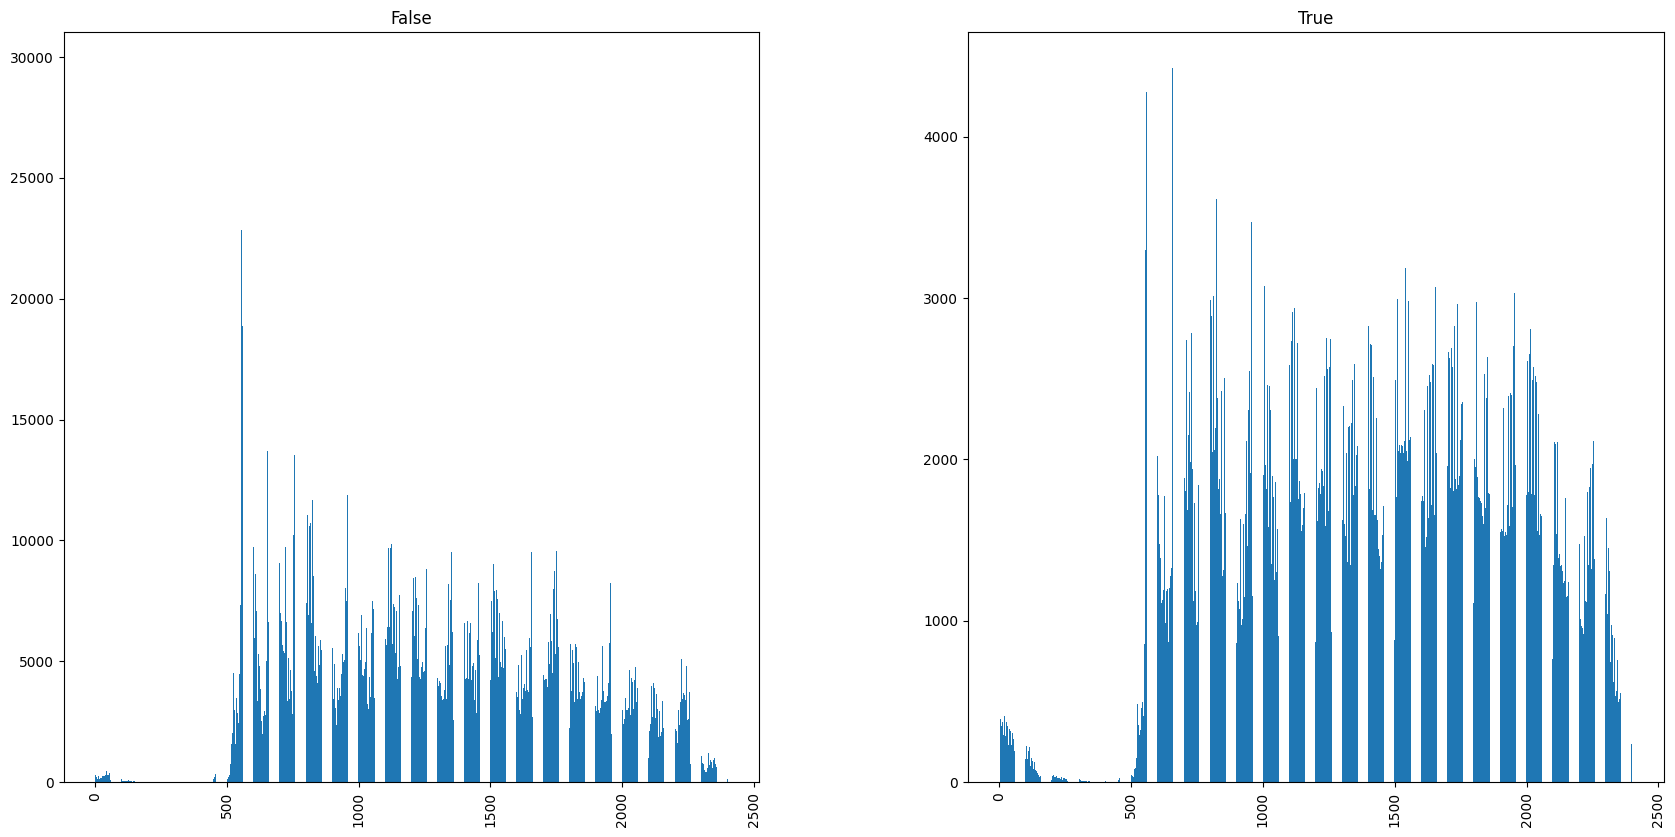

In [4]:
df.hist(column="DepTime", by="Delayed", bins=1000, figsize=(20, 10))

<AxesSubplot: >

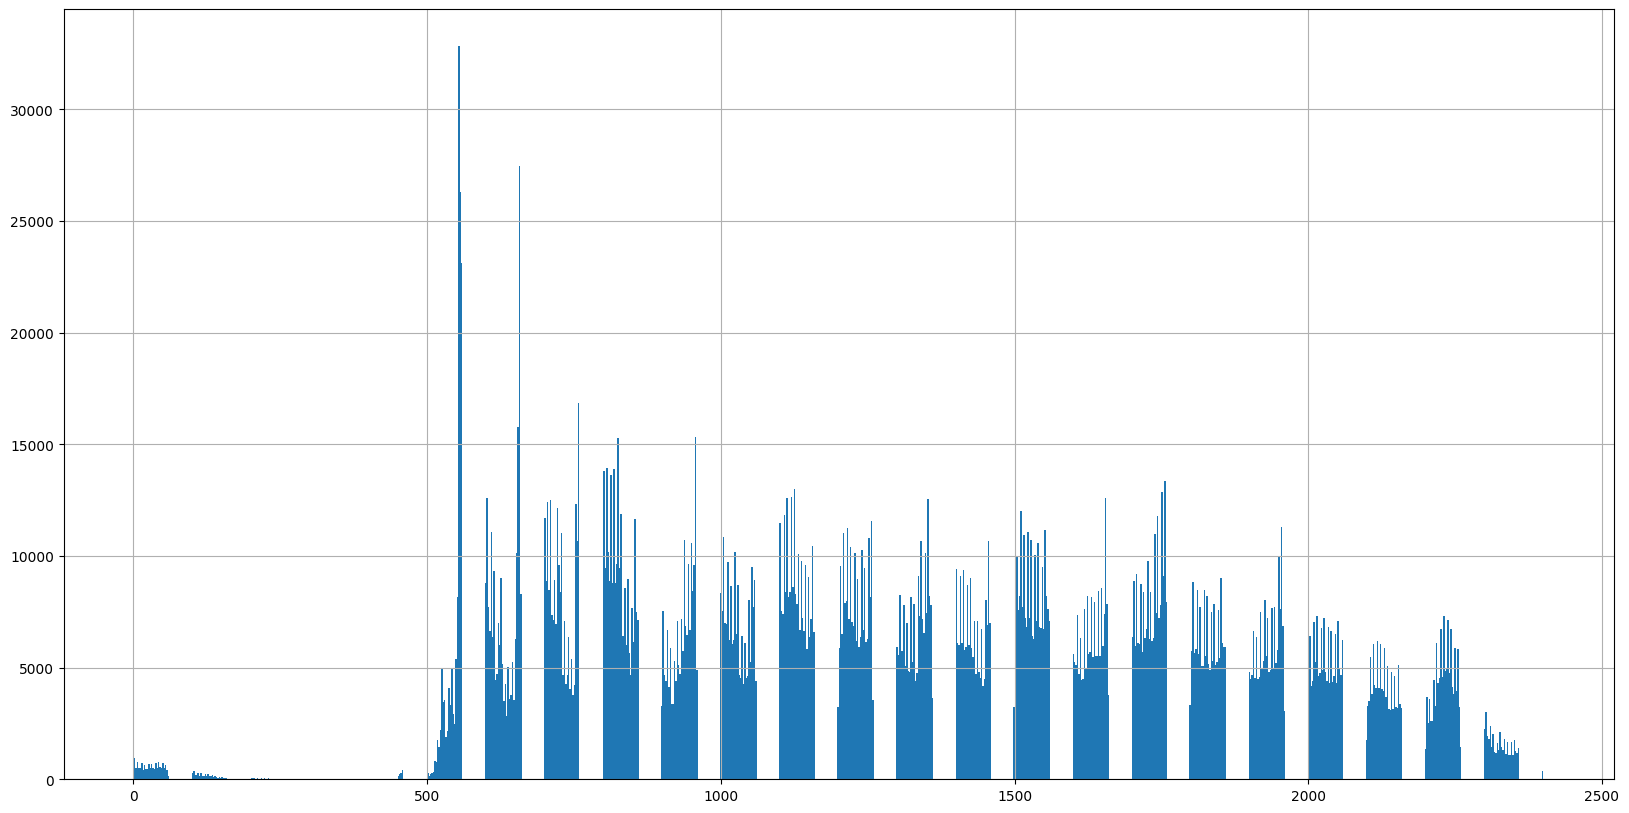

In [5]:
df["DepTime"].hist(bins=1000, figsize=(20, 10))

# plot a histogram of DepTime by separing Delayed and non Delayed flights


In [6]:
df["Delayed"].value_counts()
885704 / (885704 + 2356436)


0.2731849950958318

## Computing the average delay for one specific trip on the average of all previous flights.

`ArrDelayMinutes`


In [9]:
# create a categorical variable saying whetere a flight is delayed or not
df["Delayed"] = df["ArrDelay"] > 0

# sort by date
df = df.sort_values(by=["FlightDate"], ascending=True)
df_small = df[["Flight_Number_Operating_Airline", "DistanceGroup", "Tail_Number", "Dest", "ArrDelayMinutes"]]

avgs_flight_number = []
avgs_distance_group = []
avgs_aircraft = []
avgs_origin = []

for i in tqdm(range(len(df_small))):

    row = df_small.iloc[i]
    flight_number = row["Flight_Number_Operating_Airline"]
    distance_group = row["DistanceGroup"]
    tail_number = row["Tail_Number"]
    destination = row["Dest"]
    data = df_small[0:i]

    ##### Average delay for each FlightNumber #####
    # data1 = data[data["Flight_Number_Operating_Airline"] == flight_number]
    avgs_flight_number.append(
        data[data["Flight_Number_Operating_Airline"] == flight_number][
            "ArrDelayMinutes"
        ].mean()
    )

    ##### Average delay for each DistanceGroup #####
    # data2 = data[data["DistanceGroup"] == distance_group]
    avgs_distance_group.append(
        data[data["DistanceGroup"] == distance_group]["ArrDelayMinutes"].mean()
    )

    ##### Average delay for each aircraft #####
    avgs_distance_group.append(
        data[data["Tail_Number"] == tail_number]["ArrDelayMinutes"].mean()
    )

    ##### Average delay for each airport as DESTINATION #####
    # data4 = data[data["Dest"] == destination]
    avgs_origin.append(data[data["Dest"] == destination]
                       ["ArrDelayMinutes"].mean())


# Saving results
df["AverageDelayPerFlightNumber"] = avgs_flight_number
df["AverageDelayPerDistanceGroup"] = avgs_distance_group
df["AverageDelayPerAircraft"] = avgs_aircraft
df["AverageDelayPerOrigin"] = avgs_origin

  0%|          | 6568/3242140 [00:05<42:50, 1258.90it/s]


KeyboardInterrupt: 

### 1. Compute the average delay for each year, for specific trip.

First, check if most trips have enough flights. We see here that only


<AxesSubplot: >

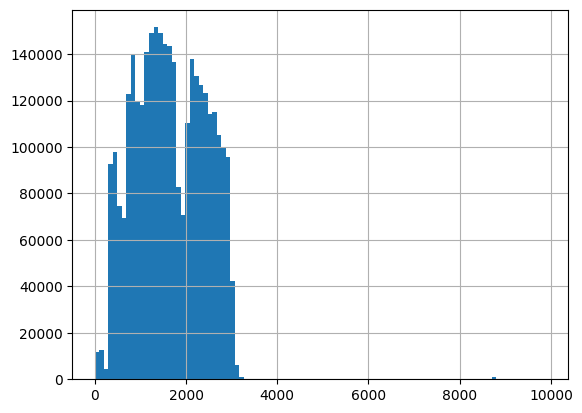

In [ ]:
df["Flight_Number_Operating_Airline"].hist(bins=100)


In [ ]:
print(len(df[df["Flight_Number_Operating_Airline"] < 25]))
print((1528 / len(df)))


1528

In [25]:
# drop Tail_Number and Flight_Number_Operating_Airline and FlightDate
df.drop(
    columns=["Tail_Number", "Flight_Number_Operating_Airline", "FlightDate"],
    inplace=True,
)

In [26]:
df.to_csv("../data/delta_combined_flights_2018_2022_preprocessed.csv", index=False)


,Origin,Dest,DepTime,DepDelayMinutes,DepDelay,ArrDelayMinutes,AirTime,Distance,CRSElapsedTime,DayOfWeek,Year,Month,OriginAirportID,DestAirportID,DepDel15,DepartureDelayGroups,TaxiOut,CRSArrTime,ArrDelay,DistanceGroup,Delayed,TimeOfDay
0,ATL,ORF,1606,0.0,-2.0,0.0,73.0,516.0,95.0,6,2018,1,10397,13931,0.0,-1.0,8.0,1743,-13.0,3,False,Afternoon
1,ATL,GSO,1656,0.0,-4.0,0.0,48.0,306.0,75.0,6,2018,1,10397,11995,0.0,-1.0,10.0,1815,-18.0,2,False,Afternoon
2,TPA,MSP,716,0.0,-4.0,0.0,173.0,1306.0,207.0,6,2018,1,15304,13487,0.0,-1.0,15.0,947,-19.0,6,False,Morning
3,LIH,LAX,2219,0.0,-6.0,7.0,311.0,2615.0,319.0,6,2018,1,12982,12892,0.0,-1.0,17.0,544,7.0,11,True,Evening
4,SMF,SLC,553,0.0,-7.0,0.0,73.0,532.0,103.0,6,2018,1,14893,14869,0.0,-1.0,12.0,843,-19.0,3,False,Night


# Split the data into train and test set
